In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Titanic Dataset

In [14]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

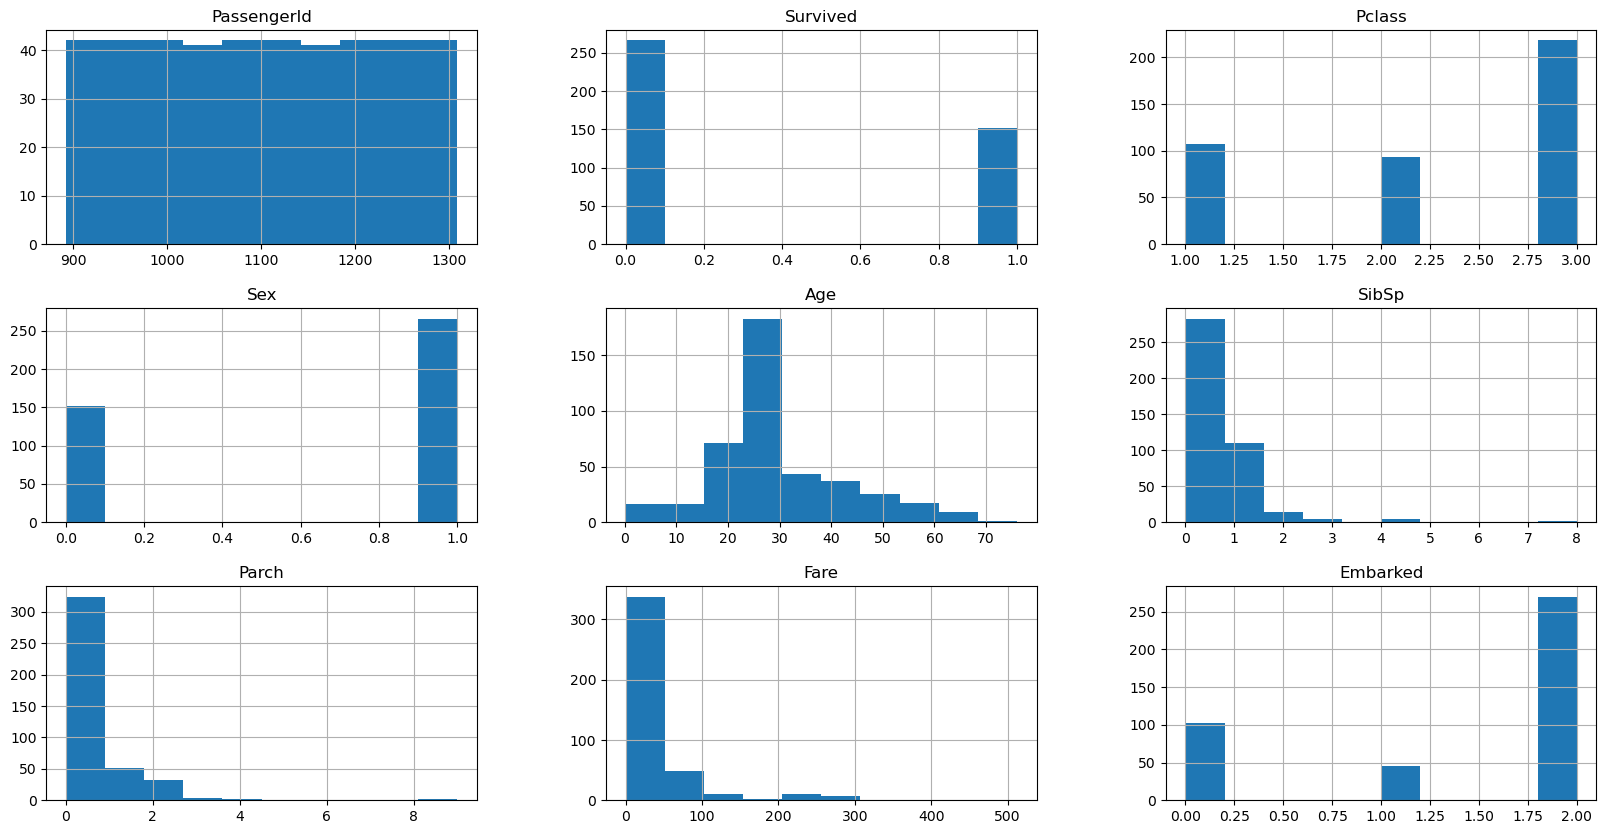

In [21]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df.hist(figsize = (20,10))

Model Accuracy: 1.0000


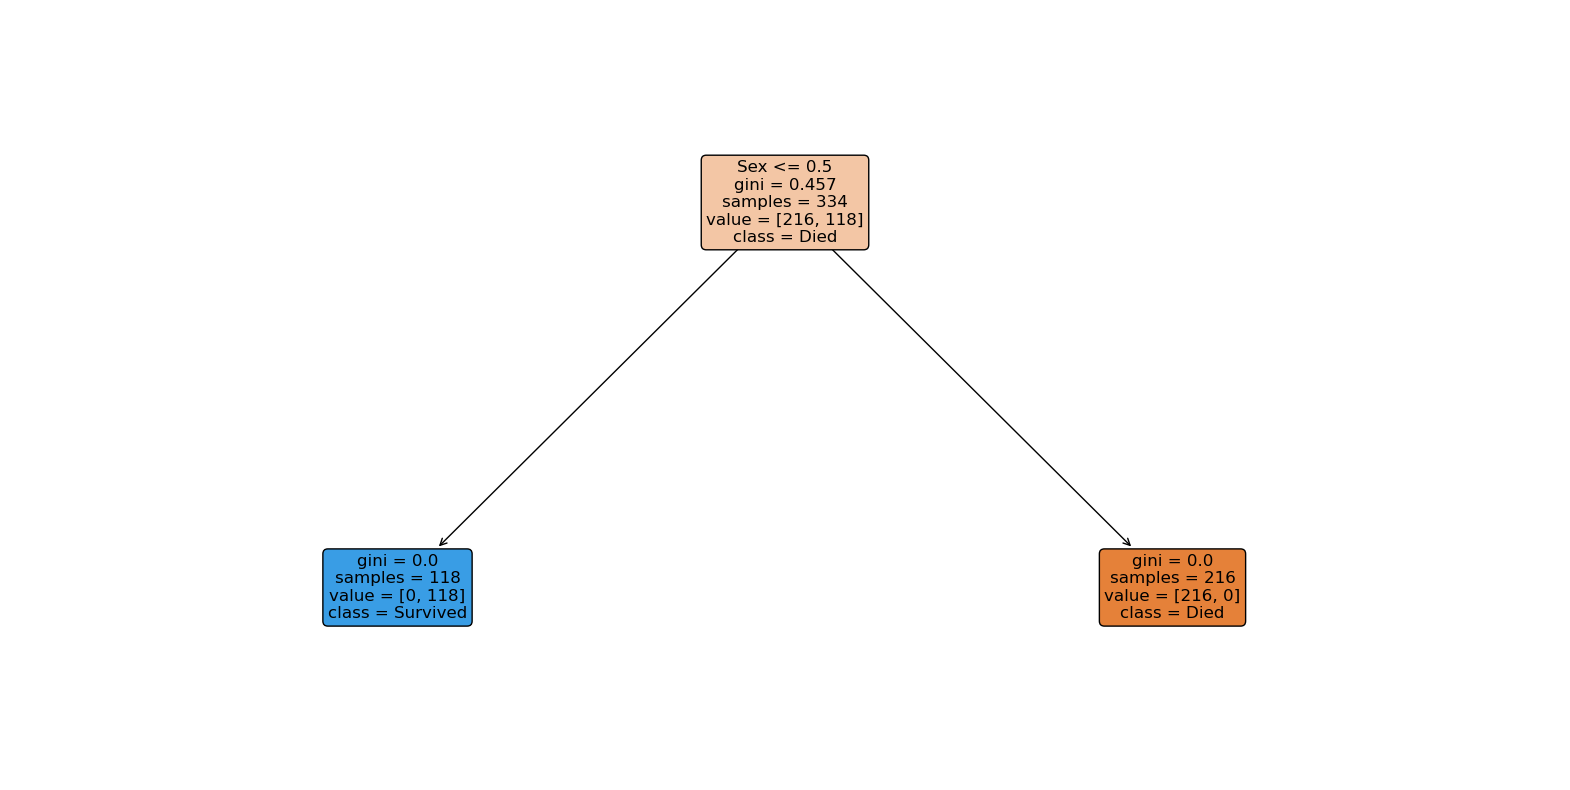

In [19]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=list(X.columns),class_names=["Died", "Survived"], rounded=True, fontsize=12)
plt.show()

# Play Golf Dataset

In [24]:
df = pd.read_csv("play_golf.csv")
df

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


array([[<Axes: title={'center': 'OUTLOOK'}>,
        <Axes: title={'center': 'TEMPERATURE'}>],
       [<Axes: title={'center': 'HUMIDITY'}>,
        <Axes: title={'center': 'WINDY'}>],
       [<Axes: title={'center': 'PLAY GOLF'}>, <Axes: >]], dtype=object)

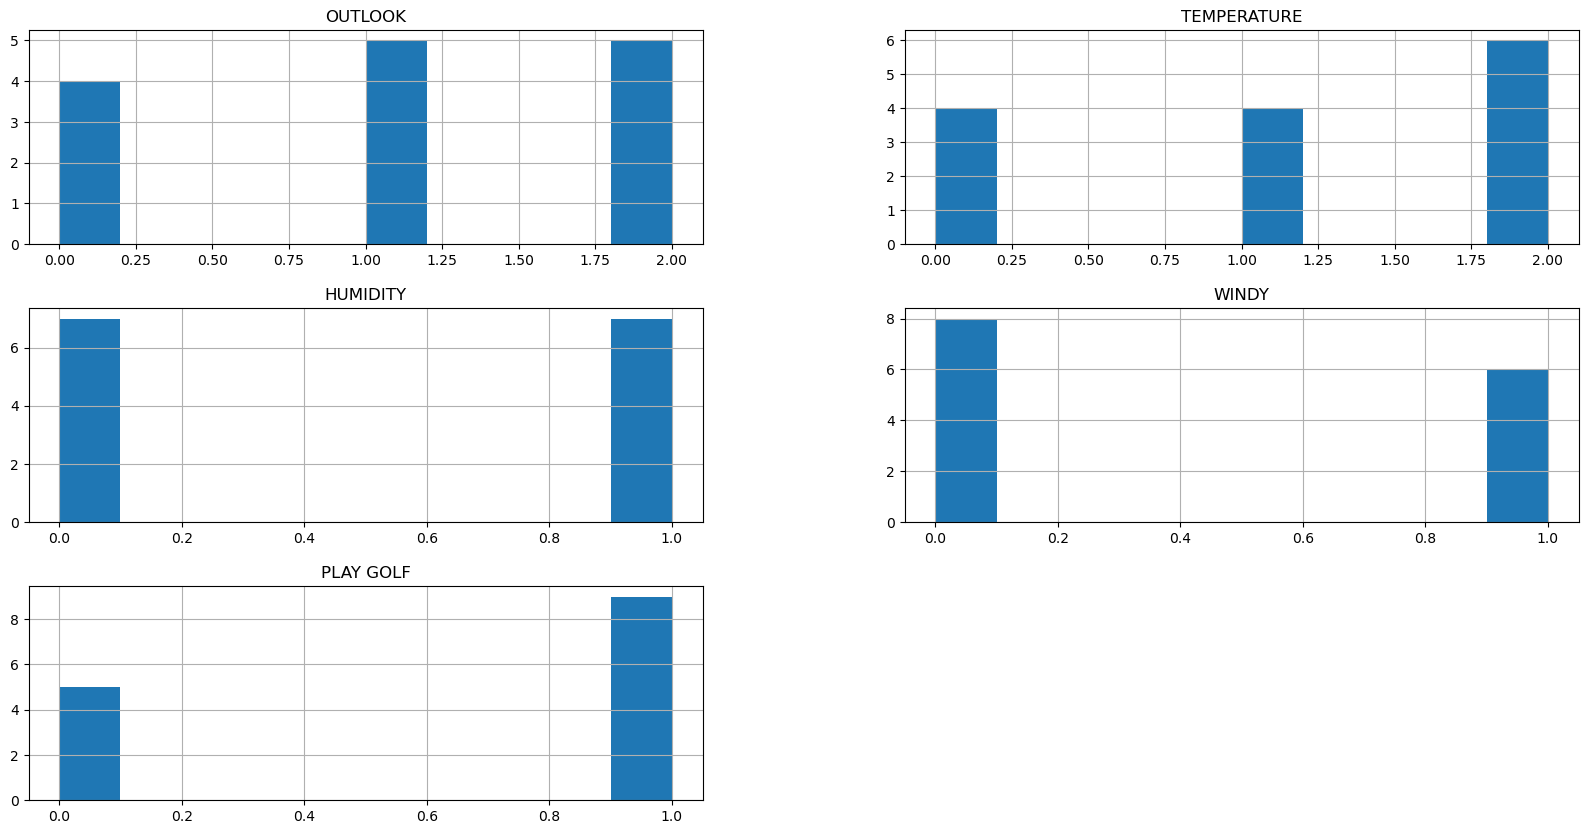

In [27]:
df.hist(figsize = (20,10))

In [ ]:
df['OUTLOOK'] = LabelEncoder().fit_transform(df['OUTLOOK'])
df['TEMPERATURE'] = LabelEncoder().fit_transform(df['TEMPERATURE'])
df['HUMIDITY'] = LabelEncoder().fit_transform(df['HUMIDITY'])
df['WINDY'] = LabelEncoder().fit_transform(df['WINDY'])
df['PLAY GOLF'] = LabelEncoder().fit_transform(df['PLAY GOLF'])

X = df[['OUTLOOK', 'TEMPERATURE', 'HUMIDITY', 'WINDY']]
y = df['PLAY GOLF']
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=list(X.columns),class_names=["No", "Yes"], rounded=True, fontsize=12)
plt.show()